<a href="https://colab.research.google.com/github/mkmagaya/Attendance-System-Face-Recognition/blob/master/Zindi_financial_inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

In [ ]:
Train = pd.read_csv("Train_1.csv")
Test = pd.read_csv("Test_1.csv")
variable = pd.read_csv("variableDefinitions.csv")

In [ ]:
Train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
print(variable)

      Variable Definitions                                         Unnamed: 1
0                  country                         Country interviewee is in.
1                     year                           Year survey was done in.
2                 uniqueid             Unique identifier for each interviewee
3            location_type                     Type of location: Rural, Urban
4         cellphone_access  If interviewee has access to a cellphone: Yes, No
5           household_size               Number of people living in one house
6        age_of_respondent                         The age of the interviewee
7     gender_of_respondent                Gender of interviewee: Male, Female
8   relationship_with_head  The interviewee’s relationship with the head o...
9           marital_status  The martial status of the interviewee: Married...
10         education_level  Highest level of education: No formal educatio...
11                job_type  Type of job interviewee has: Farming

In [ ]:
Test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


#### The Train data contains 13 columns and 23524 rows while the Test data contains 10086 rows and 12 columns. The difference in column number is because the target variable (bank_account) is not in the test data. 

In [ ]:
print(f'Train shape {Train.shape}, Test shape {Test.shape}')

Train shape (23524, 13), Test shape (10086, 12)


#### I further explored the Train data to know the data type of each variable and to check if there are any missing values (Checked this by comparing the non-null to the number of rows). The figure below contains my output;

In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


#### Next, I checked the ratio of the target variable to know if it was balanced. An imbalanced data would affect the prediction, so it is crucial to check this information. The result showed that the ratio is 86:14. 86% of the sample has no bank account while only 14% have bank accounts. This result tells that the target variable is imbalanced.

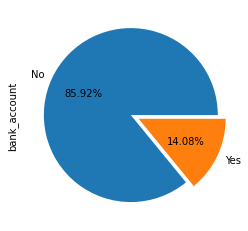

In [ ]:
Train['bank_account'].value_counts().plot(kind='pie',autopct='%1.2f%%', explode=[0,0.1])
plt.show()

![plot_3](sylvia_03.png)

#### Below are visualisations of the target variable (bank account) grouped by the categorical variables and also the graphical representation of each category.

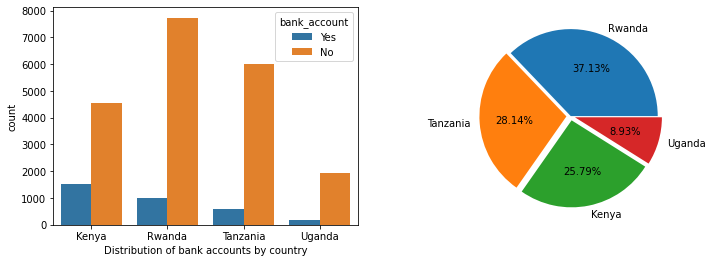

country   bank_account
Kenya     No              0.749341
          Yes             0.250659
Rwanda    No              0.885175
          Yes             0.114825
Tanzania  No              0.908308
          Yes             0.091692
Uganda    No              0.913851
          Yes             0.086149
Name: bank_account, dtype: float64

In [ ]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=[12,4])
sns.countplot(data= Train, x ='country', hue='bank_account', ax=ax0)
Train['country'].value_counts().plot(kind='pie',autopct='%1.2f%%', explode=[0,0.05, 0.05, 0.05])
plt.ylabel("")
ax0.set(xlabel= 'Distribution of bank accounts by country')
plt.show()
Train.groupby('country')['bank_account'].value_counts(normalize=True)

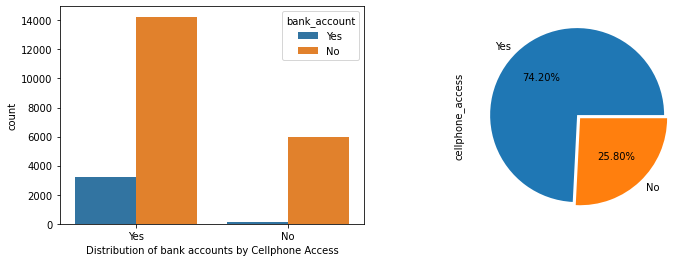

cellphone_access  bank_account
No                No              0.982867
                  Yes             0.017133
Yes               No              0.816203
                  Yes             0.183797
Name: bank_account, dtype: float64

In [ ]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=[12,4])
sns.countplot(data= Train, x ='cellphone_access', hue='bank_account', ax=ax0)
Train['cellphone_access'].value_counts().plot(kind='pie',autopct='%1.2f%%', explode=[0,0.05])
ax0.set(xlabel= 'Distribution of bank accounts by Cellphone Access')
plt.show()
Train.groupby('cellphone_access')['bank_account'].value_counts(normalize=True)

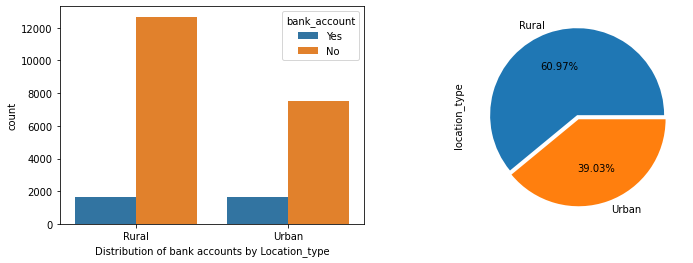

location_type  bank_account
Rural          No              0.883497
               Yes             0.116503
Urban          No              0.821261
               Yes             0.178739
Name: bank_account, dtype: float64

In [ ]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=[12,4])
sns.countplot(data= Train, x ='location_type', hue='bank_account', ax=ax0)
Train['location_type'].value_counts().plot(kind='pie',autopct='%1.2f%%', explode=[0,0.05])
ax0.set(xlabel= 'Distribution of bank accounts by Location_type')
plt.show()
Train.groupby('location_type')['bank_account'].value_counts(normalize=True)

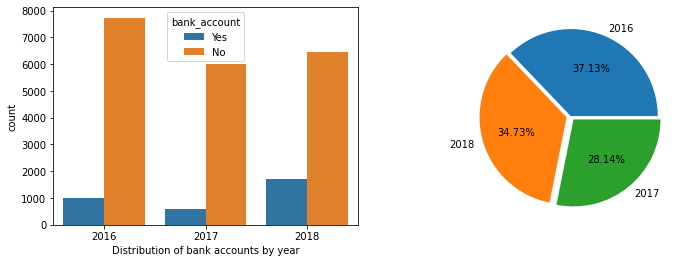

year  bank_account
2016  No              0.885175
      Yes             0.114825
2017  No              0.908308
      Yes             0.091692
2018  No              0.791651
      Yes             0.208349
Name: bank_account, dtype: float64

In [ ]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=[12,4])
sns.countplot(data= Train, x ='year', hue='bank_account', ax=ax0)
Train['year'].value_counts().plot(kind='pie',autopct='%1.2f%%', explode=[0,0.05,0.05])
plt.ylabel("")
ax0.set(xlabel= 'Distribution of bank accounts by year')
plt.show()
Train.groupby('year')['bank_account'].value_counts(normalize=True)

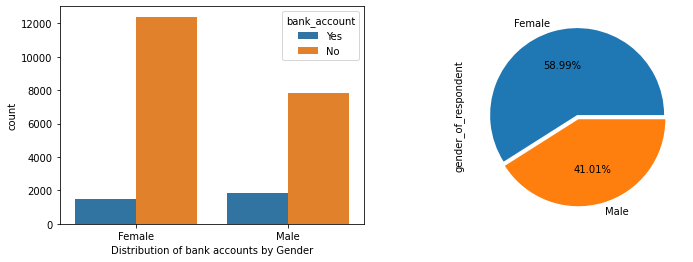

gender_of_respondent  bank_account
Female                No              0.893205
                      Yes             0.106795
Male                  No              0.810304
                      Yes             0.189696
Name: bank_account, dtype: float64

In [ ]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=[12,4])
sns.countplot(data= Train, x ='gender_of_respondent', hue='bank_account', ax=ax0)
ax0.set(xlabel= 'Distribution of bank accounts by Gender')
Train['gender_of_respondent'].value_counts().plot(kind='pie',autopct='%1.2f%%', explode=[0,0.05])
plt.show()
Train.groupby('gender_of_respondent')['bank_account'].value_counts(normalize=True)

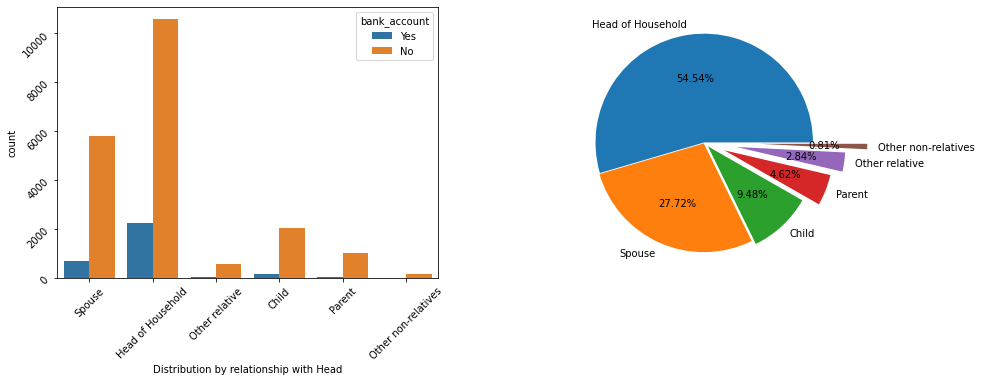

relationship_with_head  bank_account
Child                   No              0.913414
                        Yes             0.086586
Head of Household       No              0.822851
                        Yes             0.177149
Other non-relatives     No              0.894737
                        Yes             0.105263
Other relative          No              0.901198
                        Yes             0.098802
Parent                  No              0.940147
                        Yes             0.059853
Spouse                  No              0.893405
                        Yes             0.106595
Name: bank_account, dtype: float64

In [ ]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=[15,5])
sns.countplot(data= Train, x ='relationship_with_head', hue='bank_account', ax=ax0)
Train['relationship_with_head'].value_counts().plot(kind='pie',autopct='%1.2f%%', explode=[0,0.01,0.05, 0.2, 0.3, 0.5])
plt.ylabel("")
ax0.set(xlabel= 'Distribution by relationship with Head')
ax0.tick_params(labelrotation=45)
plt.show()
Train.groupby('relationship_with_head')['bank_account'].value_counts(normalize=True)

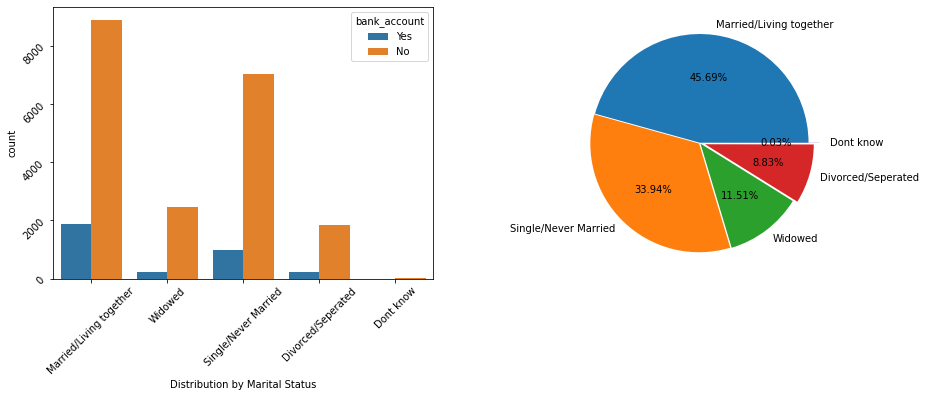

marital_status           bank_account
Divorced/Seperated       No              0.887283
                         Yes             0.112717
Dont know                No              0.750000
                         Yes             0.250000
Married/Living together  No              0.826402
                         Yes             0.173598
Single/Never Married     No              0.878993
                         Yes             0.121007
Widowed                  No              0.909897
                         Yes             0.090103
Name: bank_account, dtype: float64

In [ ]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=[15,5])
sns.countplot(data= Train, x ='marital_status', hue='bank_account', ax=ax0)
Train['marital_status'].value_counts().plot(kind='pie',autopct='%1.2f%%', explode=[0,0.01,0.01, 0.05, 0.1])
plt.ylabel("")
ax0.set(xlabel= 'Distribution by Marital Status')
ax0.tick_params(labelrotation=45)
plt.show()
Train.groupby('marital_status')['bank_account'].value_counts(normalize=True)

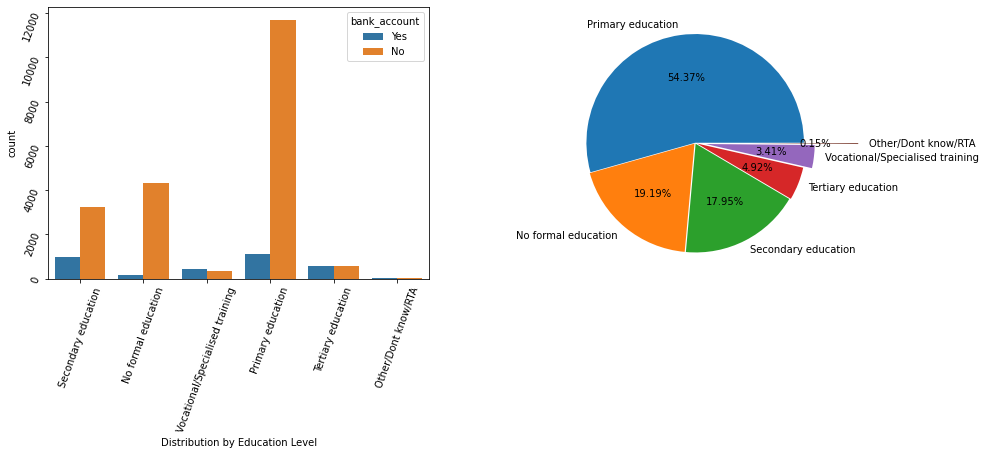

education_level                  bank_account
No formal education              No              0.961019
                                 Yes             0.038981
Other/Dont know/RTA              No              0.685714
                                 Yes             0.314286
Primary education                No              0.914549
                                 Yes             0.085451
Secondary education              No              0.767227
                                 Yes             0.232773
Tertiary education               Yes             0.510804
                                 No              0.489196
Vocational/Specialised training  Yes             0.570361
                                 No              0.429639
Name: bank_account, dtype: float64

In [ ]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=[15,5])
sns.countplot(data= Train, x ='education_level', hue='bank_account', ax=ax0)
Train['education_level'].value_counts().plot(kind='pie',autopct='%1.2f%%', explode=[0,0.01,0.01, 0.02, 0.1, 0.5])
plt.ylabel("")
ax0.set(xlabel= 'Distribution by Education Level')
ax0.tick_params(labelrotation=70)
plt.show()
Train.groupby('education_level')['bank_account'].value_counts(normalize=True)

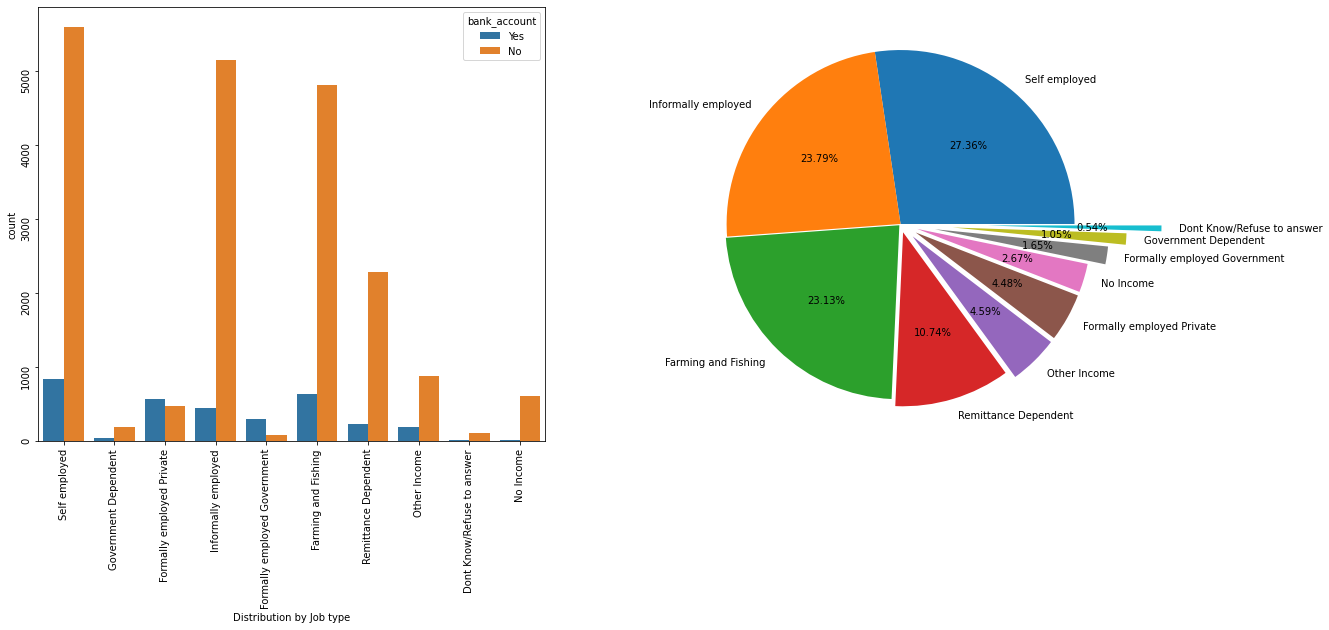

job_type                      bank_account
Dont Know/Refuse to answer    No              0.888889
                              Yes             0.111111
Farming and Fishing           No              0.883294
                              Yes             0.116706
Formally employed Government  Yes             0.775194
                              No              0.224806
Formally employed Private     Yes             0.541232
                              No              0.458768
Government Dependent          No              0.797571
                              Yes             0.202429
Informally employed           No              0.920493
                              Yes             0.079507
No Income                     No              0.979266
                              Yes             0.020734
Other Income                  No              0.818519
                              Yes             0.181481
Remittance Dependent          No              0.905026
                      

In [ ]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=[20,8])
sns.countplot(data= Train, x ='job_type', hue='bank_account', ax=ax0)
Train['job_type'].value_counts().plot(kind='pie',autopct='%1.2f%%', explode=[0,0,0.01,0.05,0.1,0.1,0.1,0.2,0.3,0.5])
plt.ylabel("")
ax0.set(xlabel= 'Distribution by Job type')
ax0.tick_params(labelrotation=90)
plt.show()
Train.groupby('job_type')['bank_account'].value_counts(normalize=True)

#### Below is the summary of the probabilties extracted from these graphs

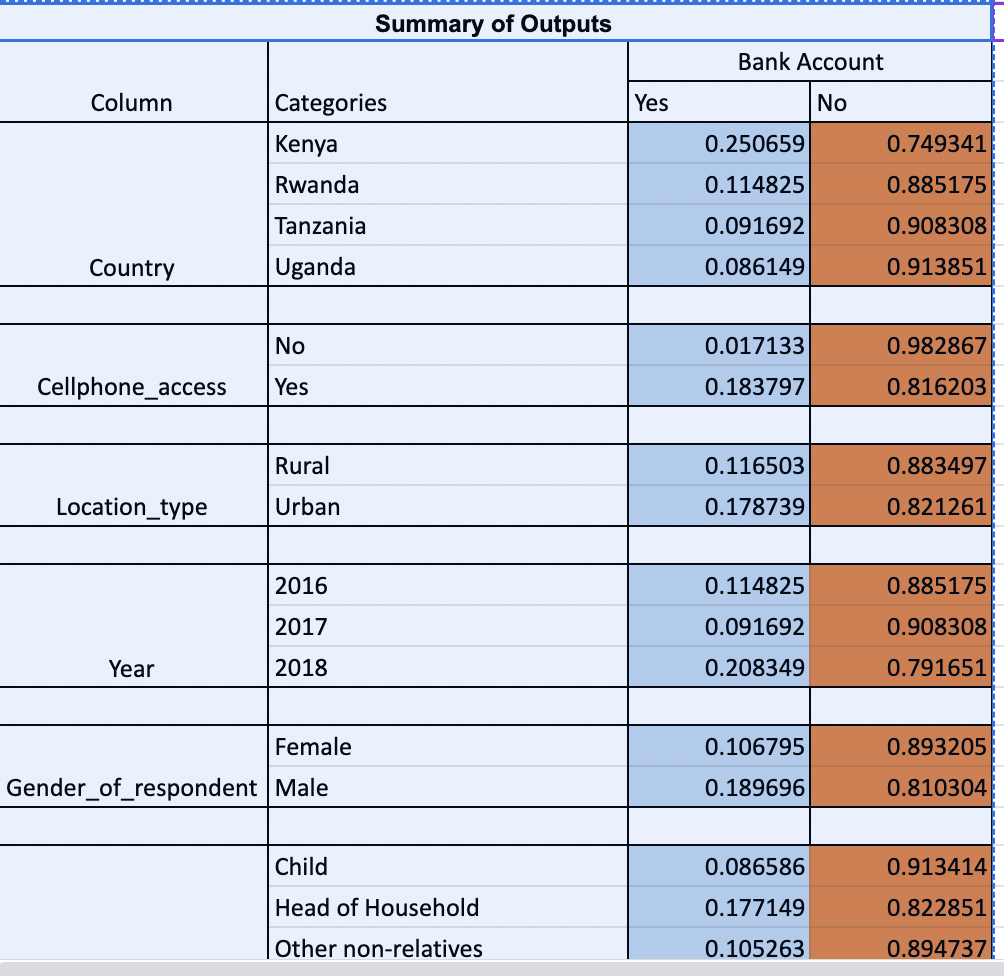

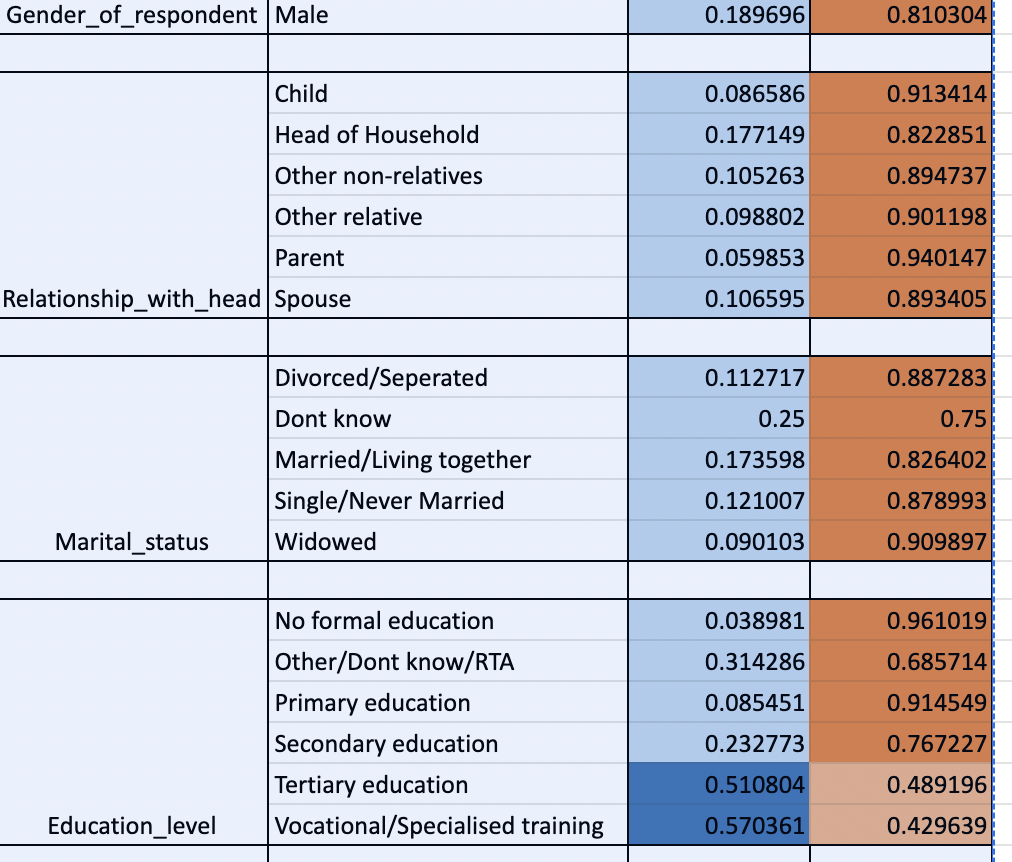

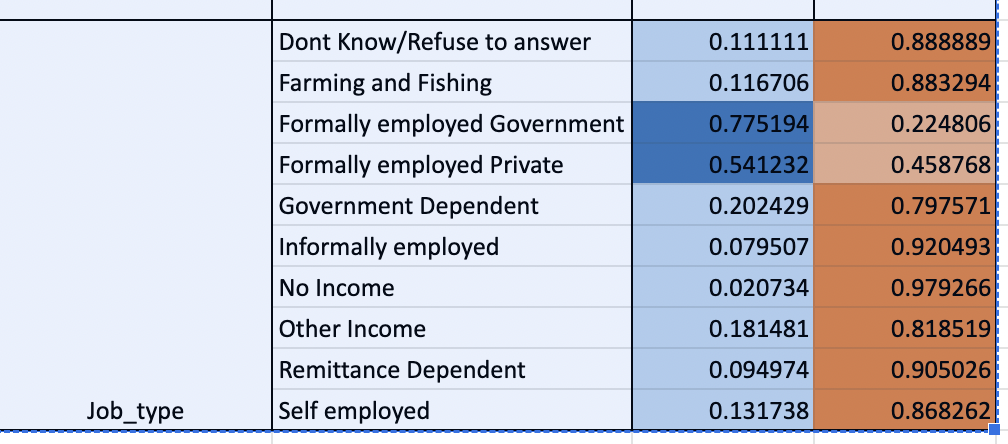

#### I used boxplot to visualise the distribution of the numerical variables (household size and age_of_respondent). The presence of outliers is marked with asterisks outside the whiskers of the box plot. 

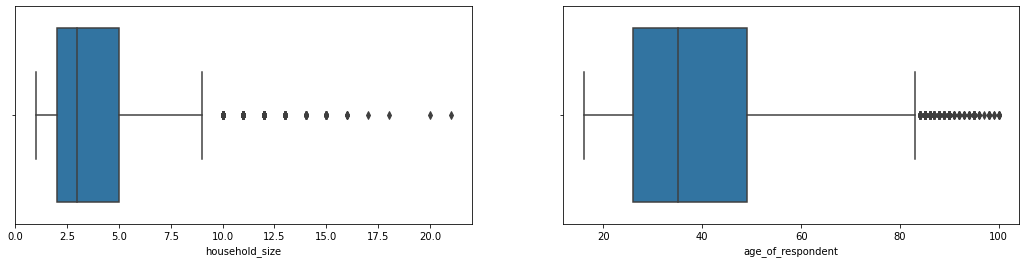

In [ ]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=[18,4])
sns.boxplot(x= 'household_size', data = Train, ax = ax0)
sns.boxplot(x= 'age_of_respondent', data = Train, ax = ax1)

#### In the quest to understand the distribution better, I calculated the value of the outliers. It shows that values greater than or equal to 10 are considered outliers for household_size while values greater than or equal to 85 are outliers for age_of_respondent

In [ ]:
q1, q3 = np.quantile(Train['household_size'], 0.25), np.quantile(Train['household_size'], 0.75)
iqr = q3-q1
print (f'q1 = {q1}, q3 = {q3}, iqr = {iqr}')
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers_size = Train['household_size'][(Train['household_size'] <= lower_bound) | (Train['household_size'] >= upper_bound)]
outliers_size.value_counts()

q1 = 2.0, q3 = 5.0, iqr = 3.0


10    190
11     69
12     68
13     25
15     11
14     10
16      4
21      1
18      1
17      1
20      1
Name: household_size, dtype: int64

In [ ]:
q01, q03 = np.quantile(Train['age_of_respondent'], 0.25), np.quantile(Train['age_of_respondent'], 0.75)
iqr_age = q03-q01
print (f'q01 = {q01}, q03 = {q03}, iqr = {iqr_age}')
upper_bound = q03+(1.5*iqr_age)
lower_bound = q01-(1.5*iqr_age)
outliers_age = Train['age_of_respondent'][(Train['age_of_respondent'] <= lower_bound) | (Train['age_of_respondent'] >= upper_bound)]
outliers_age.value_counts()

q01 = 26.0, q03 = 49.0, iqr = 23.0


85     55
90     28
86     25
88     24
84     20
95     19
89     16
87     16
92      7
98      6
91      5
94      5
100     5
93      4
96      3
99      2
97      1
Name: age_of_respondent, dtype: int64

#### I converted the target variable to convert the values to number, this is to enhance calculation of correlation coefficient and further statistical calculations

In [ ]:
labelencoder = LabelEncoder() 
Train['bank_account'] = labelencoder.fit_transform(Train['bank_account'])
Train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


#### There is a very weak positive correlation between age_of_respondent and bank account while there exists a very weak negative correlation between bank account and household_size

In [ ]:
Train[['bank_account', 'age_of_respondent', 'household_size']].corr()

,bank_account,age_of_respondent,household_size
bank_account,1.000000,0.019429,-0.028326
age_of_respondent,0.019429,1.000000,-0.129729
household_size,-0.028326,-0.129729,1.000000


#### The result of the chi-square contingency shows the chi-square stat, the p-value and the degree of freedom. The result suggests a significant association between each of the categorical variables and bank_account. This is explained by the low p-value

In [ ]:
column_cat = [Train['country'], Train['year'], Train['location_type'], Train['cellphone_access'], Train['gender_of_respondent'], Train['relationship_with_head'], Train['marital_status'], Train['education_level'], Train['job_type']]
results = []
for column in column_cat:
    crosstab = pd.crosstab(Train['bank_account'], column)
    result = stats.chi2_contingency(crosstab)
    results.append(f'{column.name}:{result[0:3]}')
results

['country:(837.9619077963009, 2.52902574006017e-181, 3)',
 'year:(488.8145974683432, 7.165703314454751e-107, 2)',
 'location_type:(178.72103113792548, 9.218844615938627e-41, 1)',
 'cellphone_access:(1032.7610839461552, 1.3592541989722424e-226, 1)',
 'gender_of_respondent:(322.62384989978455, 3.884875437093037e-72, 1)',
 'relationship_with_head:(327.90665554178617, 9.9629019270655e-69, 5)',
 'marital_status:(193.29187150436815, 1.039579187091715e-40, 4)',
 'education_level:(3549.125449633797, 0.0, 5)',
 'job_type:(3032.2542274081948, 0.0, 9)']

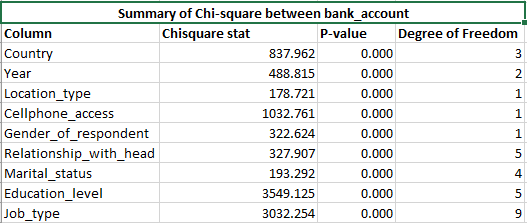